  Imports


In [32]:
# Import sklearn for matrix and data preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the data
df = pd.read_csv('../dataset/breastcancer.csv')

# Check dims
print(df.shape)

df.tail()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


We kunnen zien dat we 569 rows hebben met 33 columns. Als we snel door de data kijken kunnen we zien dat de laatste column onnodige is en die zullen we dan ook deleten

In [34]:
del df['Unnamed: 32']

Ons label "diagnosis" moet worden omgezet, categorical naar numeric.

In [35]:
encoding_dict = {
    "diagnosis": {  "M": 1,
                    "B": 0
    }
}

df = df.replace(encoding_dict)

df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Vervolgens verdelen we de features en label.

In [36]:
# Label
y = df.iloc[:, 1].values

# Features
X = df.iloc[:, 2:].values

X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

We moeten de data vervolgens verdelen in train en test data. We kiezen voor Een random sample in een 3/7 verhouding, die verhouding om overfitting te voorkomen, dit doen we moet sklearn omdat het handig is.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

We willen principle component analysis uitvoeren op de dataset, om dit te doen moeten we eerst de data standaard normaal maken. Dit kunnen we doen met de StandardScalar.

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test

array([[-0.21855296,  0.31710749, -0.14938447, ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [-0.27141746,  1.44727832, -0.33290634, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.04604776, -0.84412512, -0.11098232, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.13230036, -0.12253613, -0.14574637, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [-0.24637638,  0.56799108, -0.28682376, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [-1.35013142,  0.65639767, -1.34712739, ..., -1.36545479,
        -0.72107227, -0.54576727]])

Vervolgens voeren we PCA uit op de train en test set.

In [39]:
from sklearn.decomposition import PCA
pca_train = PCA(n_components=8)
pca_train.fit(X_train)

pca_test = PCA(n_components=8)
pca_test.fit(X_train)

PCA(n_components=8)

In [40]:
class NeuralNetwork:
    def __init__(self, X, y, X_test, y_test, hidden_nodes=42, epochs=4200, learning_rate=0.1):
        # Initialize the data
        self.X = X
        self.y = y[:,None]

        self.y_test = y_test
        self.X_test = X_test

        # parameters
        # Random seed to get same results
        np.random.seed(420)


        # Set the amount of input nodes to the length of the data frame
        self.input_nodes = len(X[0])
        # Set the amount of hidden nodes in the network.
        self.hidden_nodes = hidden_nodes
        # determine the amount of output nodes by looking at the shape of our target
        self.output_nodes = self.y.shape[1]
        # Set learning rate for gradient descent.
        self.learning_rate = learning_rate

        # Initialize weights
        self.w1 = 2 * np.random.random((self.input_nodes, self.hidden_nodes))- 1
        self.w2 = 2 * np.random.random((self.hidden_nodes, self.output_nodes))- 1


    def sigmoid(self, X):
        """
        Sigmoid activation function
        :param X:
        :return: sigmoid output
        """
        return 1 / (1 + np.exp(-X))

    def sigmoid_prime(self, X):
        """
        Sigmoid prime activation function
        :param X:
        :return: sigmoid prime output
        """
        return X * (1 - X)

    def train(self, epochs):
        """
        Train the model using the parameters set during initialization.
        Will first forward the data through the layers and perform backpropagation of errors
        :param epochs: the amount of passes through the training set.
        """
        for e in range(epochs):

            # FORWARD
            # hidden layer
            l1 = self.sigmoid(np.dot(self.X, self.w1))

            # output layer
            l2 = self.sigmoid(np.dot(l1, self.w2))

            # BACKPROPAGATION
            # calculate error margin

            error_margin = self.y - l2

            # Calculate how far off each layer is
            l2_delta = error_margin * self.sigmoid_prime(l2)
            l1_delta = l2_delta.dot(self.w2.T) * self.sigmoid_prime(l1)

            # Update weights with our error values
            self.w2 = np.add(self.w2, l1.T.dot(l2_delta) * self.learning_rate)
            self.w1 = np.add(self.w1, self.X.T.dot(l1_delta) * self.learning_rate)

        print('Error:', (abs(error_margin)).mean())

    def test(self):
        """
        Run accuracy test
        """
        correct_pred = 0
        prediction_list = []

        # Feedforward for testing
        l1 = self.sigmoid(np.dot(self.X_test, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))

        # loop through all layer two's outputs.
        for i in range(len(l2)):
            if l2[i] >= 0.5:
                prediction = 1
            else:
                prediction = 0

            if prediction == self.y_test[i]:
                correct_pred += 1

            prediction_list.append(prediction)

        print("Test Accuracy: {} %".format((correct_pred / len(y_test)) * 100))

        # Confusion matrix
        c_matrix = confusion_matrix(y_test, prediction_list)
        sns.heatmap(c_matrix, annot = True)
        plt.show()

Error: 0.010238578371784149
Test Accuracy: 96.49122807017544 %


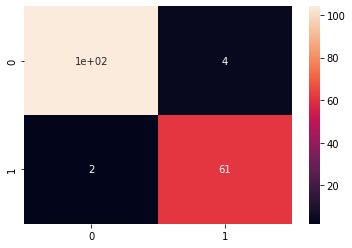

In [41]:
# Initialize the network with the data.
nn = NeuralNetwork(X_train, y_train, X_test, y_test)

# Train the network after initialization.
nn.train(420)

# Test accuracy.
nn.test()